# Designing a Regeneratively Cooled Rocket Engine

Date: 9 May 2025

-------

## Summary and Problem Statement 

A critical consideration in rocket engine design is the temperature of the combustion chamber walls. With an increase in the completeness of a combustion process comes an increase in heat production, and consequently an increase in temperature. To make the most of the rocket fuel and oxidizer, engineers aim to maximize the effectiveness of the combustion process; however, they are limited by the melting temperature of the combustion chamber material. The heat generated by the combustion process can melt through the combustion chamber walls if unregulated. 

A common solution is regenerative cooling wherein rocket fuel is used to cool the combustion chamber and simultaneously making the combustion process more efficient. 

In this project, the engine’s effectiveness will be determined by the heat it wastes (loses to non-regenerative processes). First, a potential cooling circuit will be proposed, and a cooling goal will be identified for the engine. Next, a thermodynamic analysis will be carried out on the components of the system, with key assumptions stated along the way. Finally, the project will determine the optimal post-turbine fuel pressure to maximize thrust while satisfying the cooling goal for the proposed design.

-------

## Background information 
Rocket engines work by combusting atomized fuel and oxygen in a combustion chamber to produce hot exhaust gases. These exhaust gases are accelerated through a nozzle and subsequently produce thrust<sup><a href="https://www.grc.nasa.gov/www/k-12/rocket/TRCRocket/rocket_principles.html">1</a></sup>. The 'nozzle' of a rocket typcially follows a converging-diverging design, wherein gases are first accelerated to Mach 1 in a nozzle and then passed through a diffuser since a diffuser at supersonic flows acts like a nozzle<sup><a href="https://www.engapplets.vt.edu/fluids/CDnozzle/cdinfo.html#:~:text=The%20flow%20accelerates%20out%20of,ambient%20as%20a%20subsonic%20jet.">2</a></sup>. 

## Overall Thermodynamic Process with Key Assumptions

A schematic for a regeneratively cooled rocket engine circuit is shown in the image below:

![Overall circuit diagram](images/OverallCircuit.png)

The ethanol is released at a constant temperature and pressure from the ethanol tank into a compressor, followed by the regenerator, where it takes up excess heat from the combustion chamber walls. Then, it passes through a turbine which powers the compressor. Next, it enters the combustion chamber where it is burned with liquid oxygen - also exiting its tank at a constant temperature and pressure. The exhaust gases exachange heat within the regenerator with unburned ethanol before being expelled through the nozzle. Within the engine, all the fluids pass between the different devices through appropriately-designed  tubing. Note that the atomizer and pressure regulators have been added for completeness and will be ignored in the overall analysis. At this point, some key assumptions emerge:
* The oxygen and ethanol are delivered from the tanks at a constant temperature and pressure. The flow of both liquids can be assumed as steady-flow and there are no concerns of either 'running out'. Both fluids are 100% pure. 
* There are no pressure or temperature drops in any of the tubing. Concerns about the tubes melting are also neglected and it is assumed at the material of the tubing is able to withstand the maximum temperature and pressure. 
* Since we are analyzing an ideal rocket engine, the compressor, turbine and nozzle can be assumed to be isentropic. 
* The combustion products enter the nozzle at 0 velocity and exit at atmospheric pressure - essentially generating as much thrust as possible. 
                                                                                                                                     
Similarly, we can determine some key assumptions/ values of some thermodynamic properties needed:
* The ethanol enters the combustion chamber as a fluid (as per the problem statement). To further simplify, it will be approximated as a saturated liquid at the requisite temperature.
* The oxygen enters the combustion chamber as a saturated liquid at the requisite temperature and pressure.  
* Based on research<sup><a href="https://ntrs.nasa.gov/api/citations/20100033399/downloads/20100033399.pdf">3</a></sup>, the pressure of the oxygen in the tank will be $243.1 kPa$ with an assumed quality of $0$. Therefore, the oxygen enters the combustion chamber directly with these properties.  
* Based on research and reasoning, the temperature of the ethanol in the tank will be $-10 ^\circ C$ and the pressure will be assumed as $1atm \approx 101 kPa$. These values were assumed as follows: 
    * The flash point of pure ethanol is around $14 ^\circ C$ at 1atm.<sup><a href="https://ehs.stanford.edu/wp-content/uploads/19-157-Ethanol-Fact-Sheet-v2-am-mu.pdf">4</a></sup> Since it is a liquid at this pressure, there is no need to cool it excessively and no need to pressurize it beyond $101 kPa$ in the tanks themselves. 
    * Therefore, to ensure safety while maintaining efficiency, the ethanol in the tank will be maintained at $-10 ^\circ C$ so that it doesn't ignite. 
* Based on research, the initial guess for pressure of the ethanol entering the combustion chamber will be $1.5 MPa$.<sup><a href="https://gjar.org/publishpaper/vol2issue1/d86r80.pdf">5</a></sup>. We will later vary this value.
* Since ethanol combustion does not reach excessively high temperatures, the combustion chamber will be made of aluminium-6061 (a common aluminium alloy, which, on average, has a melting point of $617 ^\circ C$.<sup><a href="https://asm.matweb.com/search/specificmaterial.asp?bassnum=ma6061t6">6</a></sup> Therefore, the temperature of the exhaust gases after the regenerator is assumed to be $586.15 ^\circ C$ (95% of the melting temperature of aluminium 6061, allowing for a safety factor of 5%).  



_A note about the way the regenerator is modelled: In reality, the regenerator is connected directly to the combustion chamber - that is the regeneration process and combustion process happen simultaneously. Therefore we assume that all the heat generated by the combustion is transferred through the regenerator to the fuel as the combustion process is happening. Any excess heat will need to be removed by means other than the regenerator and thus represents inefficiency. Therefore, we want to reduce this excess heat which is not taken by the fueL._

-------

## Modeling the Thermodynamic Process



In [2]:
import matplotlib.pyplot as plt
!pip3 install CoolProp
from CoolProp.CoolProp import PropsSI

  Using cached coolprop-6.8.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (282 bytes)
Using cached coolprop-6.8.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.6 MB)


In [3]:
# setting up the fluids

fuel = "ethanol"
oxidiser = "oxygen" 

### Laying out process steps with assumptions
We populate the overall circuit diagram with the aforementioned assumptions to facilitate our analysis. Note that all temperatures in the diagram have been converted to Kelvin units using the formula: 
$$
T_{^\circ C} = T_{K} + 273.15
$$

Therefore: 

![Populated circuit diagram](images/PopulatedCircuit.png)

_Note: Some assumptions have been made which will be clarified as the analysis progresses. State 6 has been added for completeness._

### Compressor and Turbine Analysis
Since the compressor is assumed as ideal, it is isentropic. Therefore the entropy of state 1 and state 2 will be the same. Similarly, since the turbine is assumed as ideal, it is isentropic. Therefore, the entropy of state 3 and state 4 will be the same. 

Since the compressor and turbine are connected, $W_\text{turb, out}$ (work produced by the compressor), much be equal to the $W_\text{comp, in}$ in an ideal case. We need to ensure that the properties we have defined for states 1,2,3,4 align with this relation. Since the mass flow rate is constant as $\dot{m}_\text{ethanol}$, a first law relation reveals:
$$
h_2-h_1 = h_3-h_4
$$

Therefore, we can find T2, P2 and P3.

In [4]:
def T2_T3_P2_P3(P4):
    P1 = 101e3 #Pa
    T1 = 263.15 #K
    s1 = PropsSI("S","P",P1,"T",T1,fuel)
    h1 = PropsSI("H","P",P1,"T",T1,fuel) 
    
    s2 = s1
    
    x4 = 0
    s4 = PropsSI("S","P",P4,"Q",x4,fuel) 
    h4 = PropsSI("H","P",P4,"Q",x4,fuel) 
    
    s3 = s4
    
    # we need to guess a value for T2, and continually refine the guess based on the work the turbine can produce
    tol = 2 #tolerance for eqality - a lower value would not converge
    T2 = 286.45 # 95% of the flash point temperature of ethanol, guess
    
    while True:
        # Calculate properties at state 2 using the guessed T2
        h2 = PropsSI("H", "T", T2, "S", s2, fuel)
        P2 = PropsSI("P", "S", s2, "T", T2, fuel)
    
        # State 3: P3 = P2, s3 = s4
        P3 = P2
        h3 = PropsSI("H", "P", P3, "S", s3, fuel)
    
        # Check if the work balance is satisfied within tolerance
        if abs((h2 - h1) - (h3 - h4)) <= tol:
            break
    
        T2 -= 0.001 # temperature needs to be reduced to reduce compressor work required
        
        # target_h2 = abs(h1 + (h3 - h4))
        # T2 = PropsSI("T", "S", s2, "H", target_h2, fuel)
    
    #Therefore,
    P2 = PropsSI("P", "S", s2, "T", T2, fuel)
    T3 = PropsSI("T","P",P3,"S",s4,fuel)
    P3 = P2

    return T2, T3, P2, P3

T2_test, T3_test, P2_test, P3_test = T2_T3_P2_P3(1.5e6)

### Combustion Chamber Analysis
Now we have states 1,2,3,4 fully defined. We move on to analysing the combustion chamber. The complete combustion of ethanol in pure air follows the reaction: 
$$
C_2H_5OH + 3O_2 \rightarrow 2CO_2 + 3H_2O
$$

For simplicity, we will assume that there is always enough oxygen for complete combustion and that the combustion is instantaneous. Therefore, the combustion can be assumed to happen at a stoichiometric ratio, giving mass flow rates as:

In [5]:
# Setting up the mass flow rates - remain unchanged even during optimization

m_dot_ethanol = 1 # kg/s
# 1 mol of ethanol reacts with 3 moles of oxygen. Number of moles per second in 1kg of ethanol: 
M_r_ethanol = 46.07 # Table A1 
n_dot_ethanol = m_dot_ethanol/ M_r_ethanol # kmol/s

n_dot_oxygen = 3* n_dot_ethanol #kmol/s 
M_r_oxygen = 31.999 # Table A1
m_dot_oxygen = n_dot_oxygen * M_r_oxygen #kg/s

# These mass flow rates will always ensure stoichiometric combustion

# Each mole of ethanol combusted gives rise to 2 moles of CO2 and 3 moles of H20 in complete combustion
n_dot_CO2 = 2*n_dot_ethanol # kmol/s
n_dot_H2O = 3*n_dot_ethanol # kmol/s

M_r_CO2 = 44.01 # Table A1
M_r_H2O = 18.015 # Table A1

m_dot_CO2 = n_dot_CO2 * M_r_CO2 # kg/s
m_dot_H2O = n_dot_H2O * M_r_H2O # kg/s 

# print(m_dot_CO2 + m_dot_water, m_dot_ethanol + m_dot_oxygen) # should be equal but rounding errors in numerical representation lead to slight differences
# These are the mass flow rates of the combustion products 

Now that we have the mass flow rates, we can attempt to find the heat released from combustion. We assume that all this heat is passed through the regenerator and that the combustion products are directly at a temperature of $T_7$. This lets us bypass state 6 completely and avoids requring us to find the adiabatic flame temperature through a guess-and-check iterative method. Since we assume that the combustion chamber behaves as a chemically-reacting steady-flow system, we get the following energy balance: 
$$
\dot{Q}_\text{in} + \dot{W}_\text{in} + \Sigma \dot{n}_r(\bar{h}^\circ_f + \bar{h} - \bar{h}^\circ)_r = \dot{Q}_\text{out} + \dot{W}_\text{out} + \Sigma \dot{n}_p(\bar{h}^\circ_f + \bar{h} - \bar{h}^\circ)_p
$$
Where $r$ stands for the reactants and $p$ stands for the products. Since there is no net heat or net work input to the adiabatic combustion chamber, this relation simplifies to: 
$$
\Sigma \dot{n}_r(\bar{h}^\circ_f + \bar{h} - \bar{h}^\circ)_r =  \Sigma \dot{n}_p(\bar{h}^\circ_f + \bar{h} - \bar{h}^\circ)_p
$$                                                                      
We also assume that the reaction follows the following state-wise formulation, since after combustion the water will have evaporated to gas:
$$
C_2H_5OH_\text{(l)} + 3O_\text{2 (g)} \rightarrow 2CO_\text{2 (g)} + 3H_2O_\text{(g)}
$$

Therefore, per kmol of ethanol:
$$
\dot {q}_\text {out} = \Sigma \dot{n}_p(\bar{h}^\circ_f + \bar{h} - \bar{h}^\circ)_p - \Sigma \dot{n}_r(\bar{h}^\circ_f + \bar{h} - \bar{h}^\circ)_r
$$

In [6]:
def combustion_heat(P4):
    P5 = 243100 # Pa
    x5 = 0
    x4 = 0 # problem's constraint
    
    T7 = 859.3 # K
    
    # standard enthaplies of formation (Table A26): 
    hf_o_ethanol = -277690 
    hf_o_oxygen = 0
    hf_o_CO2 = -393520
    hf_o_H2O = -241820 
    
    # molar enthalpies at 298K, 1atm = 101325Pa
    h_o_ethanol = PropsSI("H", "P", 101325, "T", 298, "ethanol") / M_r_ethanol/ 1000 # kJ/ kmol
    h_o_oxygen = PropsSI("H", "P", 101325, "T", 298, "oxygen") / M_r_oxygen/ 1000 # kJ/ kmol
    h_o_CO2 = PropsSI("H", "P", 101325, "T", 298, "CO2") / M_r_CO2/ 1000 # kJ/ kmol
    h_o_H2O = PropsSI("H", "P", 101325, "T", 298, "water") / M_r_H2O/ 1000 # kJ/ kmol
    
    # molar enthalpies of reactants at given state
    h_ethanol = PropsSI("H", "P", P4, "Q", x4, "ethanol") / M_r_ethanol/ 1000
    h_oxygen = PropsSI("H", "P", P5, "Q", x5, "oxygen") / M_r_oxygen/ 1000
    
    # molar enthalpies of products at the target final state (T = 859.3K), assuming they are ideal gases
    h_CO2 = 34773 + (T7 - 850) * (35296 - 34773)/ (860 - 850) # interpolation (Table A20), kJ/ kmol
    h_H2O = 29846 + (T7 - 850) * (30240 - 29846)/ (860 - 850) # interpolation (Table A23), kJ/ kmol
    
    # Therefore, q_dot_out (kJ per kg of ethanol):
    q_dot_out = (-1/ M_r_ethanol) * (((n_dot_CO2 * (hf_o_CO2 + h_CO2 - h_o_CO2)) + (n_dot_H2O * (hf_o_H2O + h_H2O - h_o_H2O))) - ((n_dot_ethanol * (hf_o_ethanol + h_ethanol - h_o_ethanol)) + (n_dot_oxygen * (hf_o_oxygen + h_oxygen - h_o_oxygen))))
    return q_dot_out
    
q_dot_out_test = combustion_heat(1.5e6)
print(f'{q_dot_out_test} is the heat lost from the combustion chamber') # since we have assuemd the mass flow rate of ethanol as 1 kg/s

# The maxiumum heat that the ethanol flowing through the regenerator can take up is: 
c_p_ethanol = (PropsSI('C','P',P2_test,'T',T2_test,fuel))/1000 # assumed the value from state 2
q_max_regenerator = c_p_ethanol * (T3_test - T2_test) # since we have assuemd the mass flow rate of ethanol as 1 kg/s
print(f'{q_max_regenerator} is the maximum heat that the ethanol flowing through the regenerator can take up')

# Note that the printed values are low due to the low mass flow rates considered. 

505.8636587052228 is the heat lost from the combustion chamber
393.1804137302246 is the maximum heat that the ethanol flowing through the regenerator can take up


Clearly, we see that the ethanol cannot take up all the lost heat from the combustion chamber at 1.5MPa post-turbine pressure, implying that another cooling method will be needed to take away the extra heat. This adds weight to the rocket and therefore implies inefficiency. Therefore, as per our optimization problem we must modify the post-turbine pressure to see if we can reduce the 'wasted heat' from the combustion chamber. An ideal case will be when the heat loss from the combustion chamber is exactly matched by the maximum heat that the ethanol can take up. Note that in the case when q_max_regenerator is more than the q_dot_out_test (from the last cell), we have heat flow into the combustion gases which again would require additional cooling. Therefore, we want to find the pressure where the absolute value of (q_dot_out - q_max_regenerator) = 0. 

-----

## Improving the performance

We now consider altering the post-turbine pressure of the ethanol to see its impact on the thrust generated.

In [14]:
# Since the function that finds T2, P2, T3, P3 is relatively slow to run, we will make 10 guesses for the pressure P4 
P4_guesses = [0.5e6, 1e6, 1.5e6, 2e6, 2.5e6, 3e6, 3.5e6, 4e6, 4.5e6, 5e6] # more values on the higher side are chosen since the enthalpy of saturated liquid ethanol increases with pressure
T2_values, T3_values, P2_values, P3_values = [], [], [], []
q_dot_values = [] # these are the values for the heat that the ethanol can take up in the regenerator

for pressure in P4_guesses: 
    T2_i, T3_i, P2_i, P3_i = T2_T3_P2_P3(pressure)
    T2_values.append(T2_i); T3_values.append(T3_i); P2_values.append(P2_i); P3_values.append(P3_i)
    q_dot_values.append(combustion_heat(pressure))

q_diff_values = [] # these are the values showing the excess heat produced by the combustion process relative to the heat that the ethanol can take up

for i in range(len(T2_values)):
    c_p_ethanol = (PropsSI('C','P',P2_values[i],'T',T2_values[i],fuel))/1000    
    curr_q = c_p_ethanol * (T3_values[i] - T2_values[i])
    q_diff_values.append(abs(curr_q-q_dot_values[i]))

<function matplotlib.pyplot.show(close=None, block=None)>

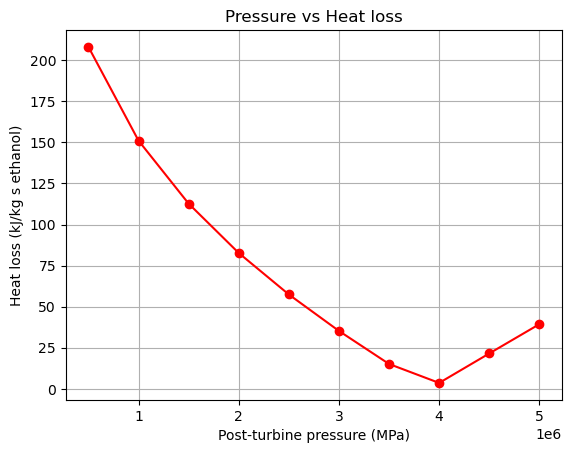

In [13]:
plt.plot(P4_guesses, q_diff_values, marker='o', linestyle='-', color='red')

plt.xlabel("Post-turbine pressure (MPa)")
plt.ylabel("Heat loss (kJ/kg s ethanol)") # this represents the additional cooling required
plt.title("Pressure vs Heat loss")
plt.grid()

plt.show

----

## Conclusions 

As the plot in the previous cell shows, increasing the pressure after the turbine generally leads to less heat loss with diminishing returns. An increased pressure will require more sturdy tubing which once again adds weight. If the pressure is too high, there is still heat loss - in the reverse direction this time as the plot shows.

Note that the state before the nozzle is fully defined since the enthalpies of the ideal exhaust gases only depends on temperature (which we have fixed). Similarly, the state after the nozzle is fully defined using the atmospheric pressure and the fact that the entropy at the exit is the same as the entropy at the inlet. Therefore the thrust produced is always the same and a pressure that minimizes weight will be preferred (we are not changing the mass flow rates of the fuel or oxidiser). 

Therefore, we conclude that the more the pressure of the fuel entering the combustion chamber, the greater the altitude that the rocket will reach. As a result, a pressure of ~4Mpa after the turbine allows the rocket to reach the greatest altitude in this design (assuming that the additional weight required to sustain the higher pressure is negligible and considering a mass flow rate of 1kg/s of ethanol). At this pressure, the heat loss is nearly 0. 

------------
### References
ASM Aerospace. “ASM Material Data Sheet.” Asm.matweb.com, 2024, asm.matweb.com/search/SpecificMaterial.asp?bassnum=MA6061T6.

Benson, Tom. “Rocket Principles.” Nasa.gov, NASA, 13 May 2021, www.grc.nasa.gov/www/k-12/rocket/TRCRocket/rocket_principles.html.

ÇengelYunus A, and Michael A Boles. Thermodynamics : An Engineering Approach. New York, Ny, Mcgraw-Hill Education, 2015.
                                                                                                                 
Devenport, William J. “Converging Diverging Nozzle.” Www.engapplets.vt.edu, www.engapplets.vt.edu/fluids/CDnozzle/cdinfo.html.
                                                                                                                 
Gottmann, C, et al. “Liquid Rocket Propellants: Ethanol as Fuel.” Global Journal of Advanced Research, vol. 2, no. 1, 30 Jan. 2015, pp. 109–119, gjar.org/publishpaper/vol2issue1/d86r80.pdf.

Stanford Environmental Health & Safety. Ethanol Factsheet.
    
Tunc, Gokturk, and Howard Wagner Yildiz. SPACE SHUTTLE UPGRADE LIQUID OXYGEN TANK THERMAL STRATIFICATION. 2001.

_draw.io was used to make the diagrams._